In [1]:
import pandas as pd
df = pd.read_csv('psych_news.csv')
df

,Title,Date,URL,text
0,PBS Prof. Emily Jacob’s article on a newly lau...,Nov \n 21 \n 2023,https://psych.ucsb.edu/news-events/news/2023/p...,An article written by PBS Assoc. Professor Emi...
1,Research on physical activity and relationship...,Nov \n 2 \n 2023,https://psych.ucsb.edu/news-events/news/2023/r...,Research by PBS Graduate student Paige Harris ...
2,The Ann S. Bowers Women’s Brain Health Initiat...,Nov \n 1 \n 2023,https://psych.ucsb.edu/news-events/news/2023/a...,The Ann S. Bowers Women’s Brain Health Initiat...
3,PBS grad Alisa Bedrov’s research on secrecy hi...,Sep \n 18 \n 2023,https://psych.ucsb.edu/news-events/news/2023/p...,A new study authored by PBS graduate student A...
4,Distinguished PBS Professor Emeritus Brenda Ma...,Sep \n 12 \n 2023,https://psych.ucsb.edu/news-events/news/2023/d...,Distinguished PBS Professor Emeritus Brenda Ma...
5,PBS professor René Weber finds that moral reas...,Sep \n 11 \n 2023,https://psych.ucsb.edu/news-events/news/2023/p...,"Santa Barbara, CA\nEvery day we encounter circ..."
6,Platform to Measure and Track Inclusion pionee...,Jul \n 13 \n 2023,https://psych.ucsb.edu/news-events/news/2023/p...,PBS and Dept of Communication Prof. René Weber...
7,Asst. Prof Regina Lapate awarded prestigious N...,Jul \n 10 \n 2023,https://psych.ucsb.edu/news-events/news/2023/a...,Psychological & Brain Sciences Assistant Profe...
8,Research relevant for mental health by PBS Ass...,Jun \n 26 \n 2023,https://psych.ucsb.edu/news-events/news/2023/r...,Ongoing work in Assistant Professor Regina Lap...
9,PBS Graduate Student Laura Pritschet awarded M...,Jun \n 12 \n 2023,https://psych.ucsb.edu/news-events/news/2023/p...,PBS PhD Candidate Laura Pritschet has recently...


In [2]:
#  Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import re
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kawaiyuen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kawaiyuen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kawaiyuen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kawaiyuen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
stop_words = set(stopwords.words('english'))
def clean_text(text):

    text = str(text).lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Rejoin tokens into a string
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to the 'text' column
df['preprocessed_text'] = df['text'].apply(clean_text)
df

,Title,Date,URL,text,preprocessed_text
0,PBS Prof. Emily Jacob’s article on a newly lau...,Nov \n 21 \n 2023,https://psych.ucsb.edu/news-events/news/2023/p...,An article written by PBS Assoc. Professor Emi...,article written pb assoc professor emily g jac...
1,Research on physical activity and relationship...,Nov \n 2 \n 2023,https://psych.ucsb.edu/news-events/news/2023/r...,Research by PBS Graduate student Paige Harris ...,research pb graduate student paige harris prof...
2,The Ann S. Bowers Women’s Brain Health Initiat...,Nov \n 1 \n 2023,https://psych.ucsb.edu/news-events/news/2023/a...,The Ann S. Bowers Women’s Brain Health Initiat...,ann bower woman brain health initiative direct...
3,PBS grad Alisa Bedrov’s research on secrecy hi...,Sep \n 18 \n 2023,https://psych.ucsb.edu/news-events/news/2023/p...,A new study authored by PBS graduate student A...,new study authored pb graduate student alisa b...
4,Distinguished PBS Professor Emeritus Brenda Ma...,Sep \n 12 \n 2023,https://psych.ucsb.edu/news-events/news/2023/d...,Distinguished PBS Professor Emeritus Brenda Ma...,distinguished pb professor emeritus brenda maj...
5,PBS professor René Weber finds that moral reas...,Sep \n 11 \n 2023,https://psych.ucsb.edu/news-events/news/2023/p...,"Santa Barbara, CA\nEvery day we encounter circ...",santa barbara ca every day encounter circumsta...
6,Platform to Measure and Track Inclusion pionee...,Jul \n 13 \n 2023,https://psych.ucsb.edu/news-events/news/2023/p...,PBS and Dept of Communication Prof. René Weber...,pb dept communication prof ren weber ongoing r...
7,Asst. Prof Regina Lapate awarded prestigious N...,Jul \n 10 \n 2023,https://psych.ucsb.edu/news-events/news/2023/a...,Psychological & Brain Sciences Assistant Profe...,psychological brain science assistant professo...
8,Research relevant for mental health by PBS Ass...,Jun \n 26 \n 2023,https://psych.ucsb.edu/news-events/news/2023/r...,Ongoing work in Assistant Professor Regina Lap...,ongoing work assistant professor regina lapate...
9,PBS Graduate Student Laura Pritschet awarded M...,Jun \n 12 \n 2023,https://psych.ucsb.edu/news-events/news/2023/p...,PBS PhD Candidate Laura Pritschet has recently...,pb phd candidate laura pritschet recently two ...


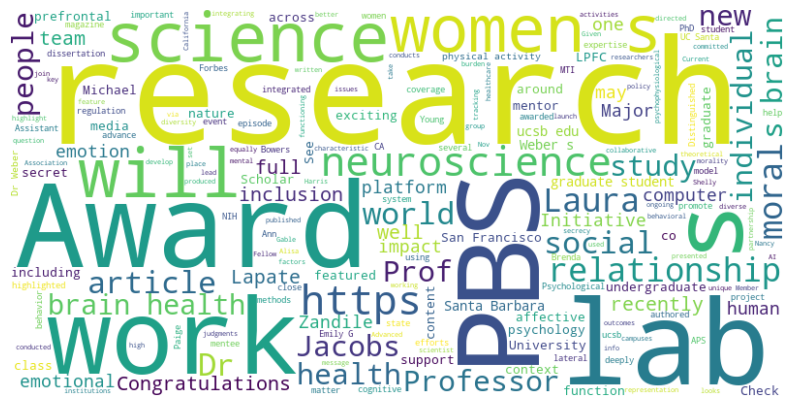

In [4]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text data into a single string
text = " ".join(content for content in df.text)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, max_font_size=150, background_color="white").generate(text)

# # Display the generated image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

/Users/kawaiyuen/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


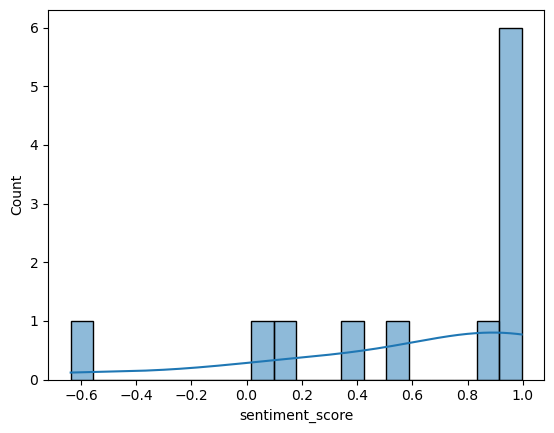

In [7]:
sia = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']

df['sentiment_score'] = df['text'].apply(lambda x: get_sentiment_score(clean_text(x)))
sns.histplot(data=df, x='sentiment_score', bins=20, kde=True)
plt.show()